# Assignment 7

In [1]:
import arcpy
from arcgis.gis import GIS

import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gis = GIS()

## Initialize Data

In [3]:
arcpy.env.workspace = r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7"
arcpy.env.overwriteOutput = True

buildings = 'Buildings.shp'
pavement = 'Edge_of_Pavement.shp'
sidewalks = 'Sidewalks.shp'
neighborhoods = "Neighborhoods.shp"

In [14]:
arcpy.management.AddField(neighborhoods, "area", "FLOAT")

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Neighborhoods.shp'>

In [15]:
arcpy.management.CalculateGeometryAttributes(neighborhoods, [['area', "AREA_GEODESIC"]], "", "SQUARE_METERS")

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Neighborhoods.shp'>

## Calculate Percentage of Features by Neighborhood

In [17]:
arcpy.analysis.SummarizeWithin(
    in_polygons=neighborhoods,
    in_sum_features=buildings,
    out_feature_class=r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Buildings",
    shape_unit="SQUAREMETERS"
)

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Kellenberger_Assignment7.gdb\\Neighborhoods_Buildings'>

In [18]:
arcpy.analysis.SummarizeWithin(
    in_polygons=neighborhoods,
    in_sum_features=pavement,
    out_feature_class=r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Pavement",
    shape_unit="SQUAREMETERS"
)

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Kellenberger_Assignment7.gdb\\Neighborhoods_Pavement'>

In [16]:
arcpy.analysis.SummarizeWithin(
    in_polygons=neighborhoods,
    in_sum_features=sidewalks,
    out_feature_class=r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Sidewalks",
    shape_unit="SQUAREMETERS"
)

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Kellenberger_Assignment7.gdb\\Neighborhoods_Sidewalks'>

In [49]:
arcpy.management.AddField('Neighborhoods_Pavement', "percentage", "FLOAT")
arcpy.management.CalculateField('Neighborhoods_Pavement', 'percentage', '(!sum_Area_SQUAREMETERS!/!area!)*100')

<Result 'Neighborhoods_Pavement'>

In [50]:
arcpy.management.AddField('Neighborhoods_Buildings', "percentage", "FLOAT")
arcpy.management.CalculateField('Neighborhoods_Buildings', 'percentage', '(!sum_Area_SQUAREMETERS!/!area!)*100')

<Result 'Neighborhoods_Buildings'>

In [51]:
arcpy.management.AddField('Neighborhoods_Sidewalks', "percentage", "FLOAT")
arcpy.management.CalculateField('Neighborhoods_Sidewalks', 'percentage', '(!sum_Area_SQUAREMETERS!/!area!)*100')

<Result 'Neighborhoods_Sidewalks'>

## Starting Analysis

### 1. See if there is a correlation between Median Household Income and the Percentage of pavement in a neighborhood.

In [52]:
arcpy.analysis.Enrich(
    in_features="Neighborhoods_Pavement",
    out_feature_class=r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Pavement_Enrich",
    variables="householdincome.MEDHINC_CY",
    buffer_type="",
    distance=1,
    unit=""
)

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Kellenberger_Assignment7.gdb\\Neighborhoods_Pavement_Enrich'>

In [7]:
pavement_df = pd.DataFrame.spatial.from_featureclass(r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Pavement_Enrich")
pavement_df.head()

,OBJECTID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,area,sum_Area_SQUAREMETERS,Polygon_Count,percentage,aggregationMethod,HasData,ORIGINAL_OID,sourceCountry,apportionmentConfidence,populationToPolygonSizeRating,householdincome_MEDHINC_CY,SHAPE
0,1,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3151540.0,91901.306948,60,2.916076,BlockApportionment:US.BlockGroups;PointsLayer:...,1,1,US,2.576,2.191,90663.0,"{""rings"": [[[10930174.000024095, 3626244.74985..."
1,2,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1676960.0,158195.268535,425,9.433455,BlockApportionment:US.BlockGroups;PointsLayer:...,1,2,US,2.576,2.191,92773.0,"{""rings"": [[[10925379.000099674, 3626181.74998..."
2,3,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,10684600.0,345314.317718,669,3.231888,BlockApportionment:US.BlockGroups;PointsLayer:...,1,3,US,2.576,2.191,127660.0,"{""rings"": [[[10919218.99995251, 3624748.249899..."
3,4,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.000000,4,978482.0,185728.848770,303,18.981325,BlockApportionment:US.BlockGroups;PointsLayer:...,1,4,US,2.576,2.191,61028.0,"{""rings"": [[[10926938.999932423, 3622980.25015..."
4,5,7748780.0,11958.65,7.0,87.0,Murphy,0.704435,5,719964.0,38127.871372,95,5.295803,BlockApportionment:US.BlockGroups;PointsLayer:...,1,5,US,2.576,2.191,62680.0,"{""rings"": [[[10926391.000044167, 3618395.50013..."


Text(0, 0.5, 'Median Household Income (in USD)')

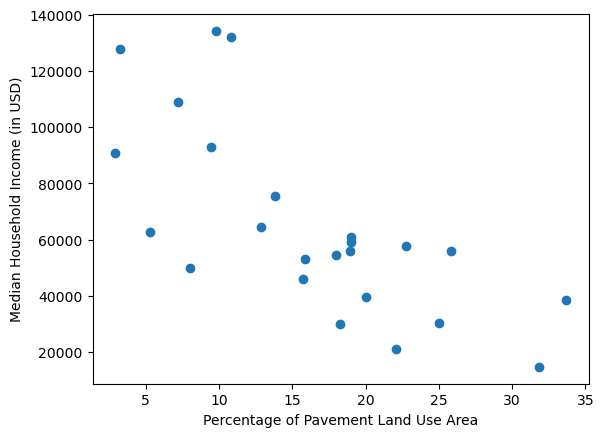

In [8]:
plt.scatter(pavement_df['percentage'], pavement_df['householdincome_MEDHINC_CY'])
plt.xlabel("Percentage of Pavement Land Use Area")
plt.ylabel("Median Household Income (in USD)")

This graph shows that there is a negative relationship between median household income and the percentage of pavement in a neioghborhood. As the percentage of pavement land use increases, the median household income decreases.

### 2. Show if there is a relationship between Average Home Value and the Percentage of Buildings in a neighborhood

In [4]:
arcpy.analysis.Enrich(
    in_features="Neighborhoods_Buildings",
    out_feature_class=r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Buildings_Enrich",
    variables="Wealth.AVGVAL_CY",
    buffer_type="",
    distance=1,
    unit=""
)

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Kellenberger_Assignment7.gdb\\Neighborhoods_Buildings_Enrich'>

In [9]:
buildings_df = pd.DataFrame.spatial.from_featureclass(r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Buildings_Enrich")
buildings_df.head()

,OBJECTID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,area,sum_Area_SQUAREMETERS,Polygon_Count,percentage,aggregationMethod,HasData,ORIGINAL_OID,sourceCountry,apportionmentConfidence,populationToPolygonSizeRating,Wealth_AVGVAL_CY,SHAPE
0,1,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3151540.0,22329.749837,160,0.708535,BlockApportionment:US.BlockGroups;PointsLayer:...,1,1,US,2.576,2.191,417722.0,"{""rings"": [[[10930174.000024095, 3626244.74985..."
1,2,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1676960.0,86841.540492,557,5.178510,BlockApportionment:US.BlockGroups;PointsLayer:...,1,2,US,2.576,2.191,364819.0,"{""rings"": [[[10925379.000099674, 3626181.74998..."
2,3,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,10684600.0,135074.897697,939,1.264202,BlockApportionment:US.BlockGroups;PointsLayer:...,1,3,US,2.576,2.191,446686.0,"{""rings"": [[[10919218.99995251, 3624748.249899..."
3,4,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.000000,4,978482.0,99366.496914,385,10.155169,BlockApportionment:US.BlockGroups;PointsLayer:...,1,4,US,2.576,2.191,361938.0,"{""rings"": [[[10926938.999932423, 3622980.25015..."
4,5,7748780.0,11958.65,7.0,87.0,Murphy,0.704435,5,719964.0,23766.286949,147,3.301038,BlockApportionment:US.BlockGroups;PointsLayer:...,1,5,US,2.576,2.191,366667.0,"{""rings"": [[[10926391.000044167, 3618395.50013..."


Text(0, 0.5, 'Average Home Value (in USD)')

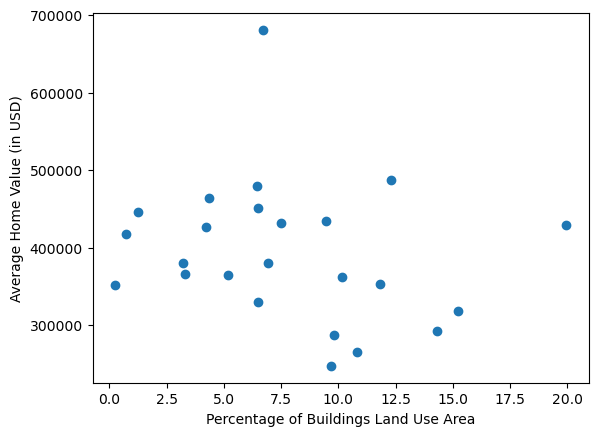

In [11]:
plt.scatter(buildings_df['percentage'], buildings_df['Wealth_AVGVAL_CY'])
plt.xlabel("Percentage of Buildings Land Use Area")
plt.ylabel("Average Home Value (in USD)")

This graph shows that there is no real relation between Average Home Value and the Percentage of Buildings land area in a neighborhood.

### 3. Show if there is a relationship between Amount of Total Businesses and Percentage of Sidewalks in a neighborhood

In [12]:
arcpy.analysis.Enrich(
    in_features="Neighborhoods_Sidewalks",
    out_feature_class=r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Sidewalks_Enrich",
    variables="businesses.S01_BUS",
    buffer_type="",
    distance=1,
    unit=""
)

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment7\\Kellenberger_Assignment7.gdb\\Neighborhoods_Sidewalks_Enrich'>

In [4]:
sidewalks_df = pd.DataFrame.spatial.from_featureclass(r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment7\Kellenberger_Assignment7.gdb\Neighborhoods_Sidewalks_Enrich")
sidewalks_df.head()

,OBJECTID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,area,sum_Area_SQUAREMETERS,Polygon_Count,percentage,aggregationMethod,HasData,ORIGINAL_OID,sourceCountry,apportionmentConfidence,populationToPolygonSizeRating,businesses_S01_BUS,SHAPE
0,1,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3151540.0,4282.895731,56,0.135899,BlockApportionment:US.BlockGroups;PointsLayer:...,1,1,US,2.576,2.191,4.0,"{""rings"": [[[10930174.000024095, 3626244.74985..."
1,2,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1676960.0,13229.394738,329,0.788891,BlockApportionment:US.BlockGroups;PointsLayer:...,1,2,US,2.576,2.191,5.0,"{""rings"": [[[10925379.000099674, 3626181.74998..."
2,3,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,10684600.0,33072.153554,539,0.309531,BlockApportionment:US.BlockGroups;PointsLayer:...,1,3,US,2.576,2.191,13.0,"{""rings"": [[[10919218.99995251, 3624748.249899..."
3,4,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.000000,4,978482.0,25852.170288,293,2.642069,BlockApportionment:US.BlockGroups;PointsLayer:...,1,4,US,2.576,2.191,44.0,"{""rings"": [[[10926938.999932423, 3622980.25015..."
4,5,7748780.0,11958.65,7.0,87.0,Murphy,0.704435,5,719964.0,2735.988089,92,0.380017,BlockApportionment:US.BlockGroups;PointsLayer:...,1,5,US,2.576,2.191,3.0,"{""rings"": [[[10926391.000044167, 3618395.50013..."


Text(0, 0.5, 'Total Amount of Businesses')

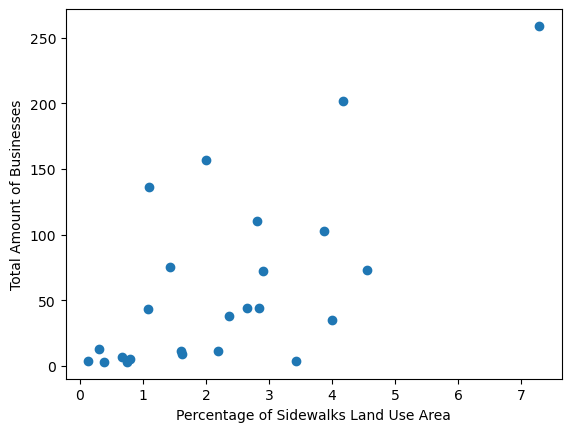

In [5]:
plt.scatter(sidewalks_df['percentage'], sidewalks_df['businesses_S01_BUS'])
plt.xlabel("Percentage of Sidewalks Land Use Area")
plt.ylabel("Total Amount of Businesses")

This graph shows that there is a slight positive relationship between the amount of businesses in a neighborhood and the amount of sidewalks land area in a neighborhood. As the amount of businesses increase, there is usually a slight increase in the amount of sidewalks in that neighborhood./